In [131]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from pandas import DataFrame, Series  # for convenience
from scipy.misc import imsave
import pims
import trackpy as tp
from pims import Frame
import math

################################################
# Read csv data of tracking
################################################
BR = [[5.7149E-08,1.1882E-05,-2.4321E-03],[8.8831E-06,-5.3566E-07,-3.8744E-02],[-1.6469E-03,3.3774E-02,9.9867E-01]]
TR = [[-5.7704E-08,1.1998E-05,-2.1514E-03],[8.9694E-06,5.4087E-07,-3.9328E-02],[-1.7813E-03,3.3894E-02,9.9865E-01]]
TL = [[1.1040E-07,2.2954E-05,-4.1584E-03],[1.7160E-05,-1.0348E-06,6.8654E-02],[-3.4505E-03,-7.3661E-02,9.9490E-01]]
BL = [[-1.0175E-07,2.1155E-05,-4.2910E-03],[1.5815E-05,9.5369E-07,6.2907E-02],[-2.8931E-03,-6.8254E-02,9.9567E-01]]
Matr = TR
normal = np.max(Matr)
MatrixL = np.array(Matr)/normal
MatrixR = MatrixL.transpose()
cL1 = [181.544,211.678,211.61]
cR1 = [59.61,211.61]

In [127]:
dfL = pd.read_csv('frameL_point_0.csv')
dfR = pd.read_csv('frameR_point_0.csv')
print(len(dfL),len(dfR))

(128, 122)


In [128]:
Sum = 0
Pair = []
for iiR in range(len(dfR)):
    xR = dfR['x'].iloc[iiR]
    yR = dfR['y'].iloc[iiR]
    ipR = [xR,yR,1]
    xL = dfL['x'].iloc[iiR]
    yL = dfL['y'].iloc[iiR]
    ipL = [xL,yL,1]
    LineL = np.dot(ipR,MatrixL) #points in the right frame and the corresponding epipolar lines in the left frame
    LineR = np.dot(ipL,MatrixR) #points in the right frame and the corresponding epipolar lines in the left frame
    dlr = math.fabs(np.dot(ipL,LineL))/math.sqrt(LineL[0]*LineL[0]+LineL[1]*LineL[1])
    drl = math.fabs(np.dot(ipR,LineR))/math.sqrt(LineR[0]*LineR[0]+LineR[1]*LineR[1])
    FF = dlr + drl
    pair = [iiR,iiR,FF]
    Pair.append(pair)
    Sum = Sum + FF
print(Sum)
#print(Pair)

1479.19962294


In [104]:
PairL = []
for iiL in range(len(dfL)):
    xL = dfL['x'].iloc[iiL]
    yL = dfL['y'].iloc[iiL]
    ipL = [xL,yL,1]
    MinInd = 0
    Min = 10000
    Min1 = 10000
    Min2 = 10000
    for iiR in range(len(dfR)):
        xR = dfR['x'].iloc[iiR]
        yR = dfR['y'].iloc[iiR]
        ipR = [xR,yR,1]
        LineL = np.dot(ipR,MatrixL) #points in the right frame and the corresponding epipolar lines in the left frame
        LineR = np.dot(ipL,MatrixR) #points in the right frame and the corresponding epipolar lines in the left frame
        dlr = math.fabs(np.dot(ipL,LineL))/math.sqrt(LineL[0]*LineL[0]+LineL[1]*LineL[1])
        drl = math.fabs(np.dot(ipR,LineR))/math.sqrt(LineR[0]*LineR[0]+LineR[1]*LineR[1])
        FF = dlr + drl
        if(FF<Min):
            MinInd = iiR
            Min = FF
            Min1 = dlr
            Min2 = drl
    pairL = [iiL,MinInd]
    PairL.append(pairL)
    print(pairL,Min1,Min2,Min)

([0, 7], 0.39070077537899267, 0.3813157414902683, 0.772016516869261)
([1, 7], 0.41567231199142934, 0.4066427223970977, 0.822315034388527)
([2, 8], 1.150075593278151, 1.1235137010600103, 2.2735892943381613)
([3, 8], 3.9067543204935617, 3.823401992206055, 7.7301563126996164)
([4, 9], 2.538459282276509, 2.4726209934445387, 5.0110802757210475)
([5, 9], 3.1109553473290372, 3.0435191687228182, 6.154474516051856)
([6, 9], 0.0518816130053474, 0.05063627532440133, 0.10251788832974873)
([7, 9], 1.1405182073318023, 1.1145486697147873, 2.2550668770465894)
([8, 12], 0.8122523796157368, 0.7878682397658133, 1.60012061938155)
([9, 15], 0.5114895507266234, 0.49586744661473975, 1.0073569973413632)
([10, 17], 0.7677144903136824, 0.7422525929214258, 1.5099670832351082)
([11, 17], 0.31370215482999675, 0.3046879379774651, 0.6183900928074618)
([12, 18], 0.05416825142174373, 0.05273184444681466, 0.10690009586855839)
([13, 19], 0.409824427695709, 0.3961322846479394, 0.8059567123436484)
([14, 20], 0.42159309694

([117, 112], 0.1270604200781273, 0.13065503268685158, 0.25771545276497887)
([118, 113], 0.18172061721837368, 0.1851820061747241, 0.36690262339309776)
([119, 115], 0.3540346901788901, 0.3573432337603693, 0.7113779239392595)
([120, 115], 0.17997967230110243, 0.1826101180032073, 0.3625897903043097)
([121, 117], 0.15566329758609537, 0.15863669969369734, 0.31429999727979274)
([122, 117], 0.09966776537809303, 0.10174529794554618, 0.20141306332363923)
([123, 118], 0.43729489084269735, 0.4467578420115584, 0.8840527328542558)
([124, 119], 0.6839930719684094, 0.6972188289000589, 1.3812119008684682)
([125, 120], 0.43662256317265297, 0.44320124756149315, 0.8798238107341461)
([126, 120], 0.5676634644856587, 0.5743649694832765, 1.1420284339689353)
([127, 120], 0.528592999352217, 0.5353725593060132, 1.0639655586582304)


In [51]:
PairR = []
for iiR in range(len(dfR)):
    xR = dfR['x'].iloc[iiR]
    yR = dfR['y'].iloc[iiR]
    ipR = [xR,yR,1]
    MinInd = 0
    Min = 10000
    Min1 = 10000
    Min2 = 10000
    for iiL in range(len(dfL)):
        xL = dfL['x'].iloc[iiL]
        yL = dfL['y'].iloc[iiL]
        ipL = [xL,yL,1]
        LineL = np.dot(ipR,MatrixL) #points in the right frame and the corresponding epipolar lines in the left frame
        LineR = np.dot(ipL,MatrixR) #points in the right frame and the corresponding epipolar lines in the left frame
        dlr = math.fabs(np.dot(ipL,LineL))/math.sqrt(LineL[0]*LineL[0]+LineL[1]*LineL[1])
        drl = math.fabs(np.dot(ipR,LineR))/math.sqrt(LineR[0]*LineR[0]+LineR[1]*LineR[1])
        FF = dlr + drl
        if(FF<Min):
            MinInd = iiL
            Min = FF
            Min1 = dlr
            Min2 = drl
    pairR = [iiR,MinInd]
    PairR.append(pairR)
    print(pairR,Min1,Min2,Min)

([0, 0], 9.040749906247958, 8.91327625527713, 17.95402616152509)
([1, 0], 8.556081747906799, 8.468656955520398, 17.024738703427197)
([2, 0], 5.395117383086675, 5.308226937261099, 10.703344320347774)
([3, 0], 4.983221285704667, 4.917298291870516, 9.900519577575183)
([4, 0], 3.495604579764129, 3.4310102597317917, 6.926614839495921)
([5, 0], 3.1617254538947774, 3.1146844396481703, 6.276409893542947)
([6, 0], 0.7963474003429453, 0.7865356774342689, 1.5828830777772143)
([7, 0], 0.662544731535428, 0.6511148052981366, 1.3136595368335646)
([8, 2], 1.3604301756883528, 1.338007801362624, 2.6984379770509768)
([9, 6], 0.3939345503241517, 0.38692469476236424, 0.7808592450865159)
([10, 7], 1.8053104838439837, 1.7670196049765048, 3.5723300888204887)
([11, 8], 1.9817558569767115, 1.942749718044848, 3.9245055750215596)
([12, 8], 1.328865536863072, 1.2966905860364417, 2.6255561228995137)
([13, 8], 2.0540588136916336, 2.0069074729290035, 4.060966286620637)
([14, 8], 2.303664639665551, 2.2429899089146272,

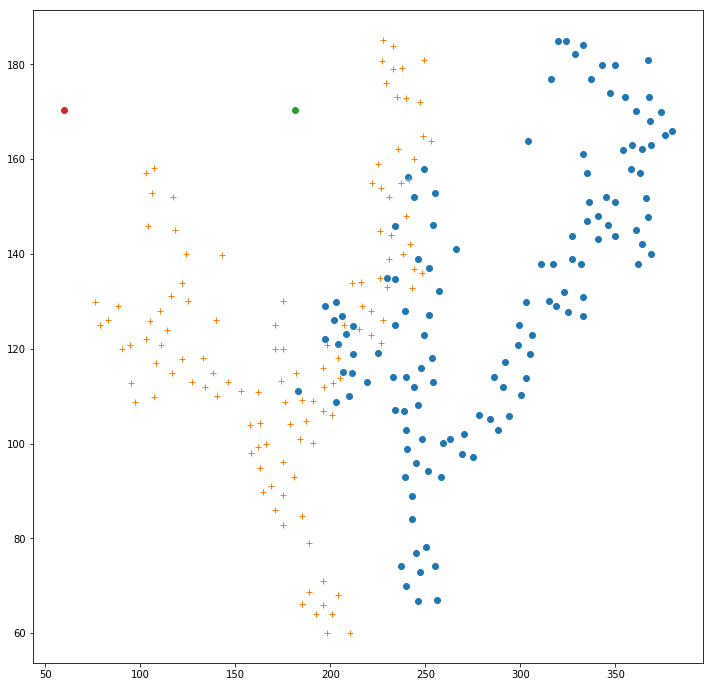

In [136]:
iiL = 0
iiR = 7
plt.figure()
plt.figure(figsize=[12,12])
plt.plot(dfL['x'],dfL['y'],'o')
plt.plot(dfR['x'],dfR['y'],'+')
#plt.plot(dfL['x'].iloc[iiL],dfL['y'].iloc[iiL],'o')
#plt.plot(dfR['x'].iloc[iiR],dfR['y'].iloc[iiR],'o')
plt.show()

In [129]:
iiL = 0
xL = dfL['x'].iloc[iiL]
yL = dfL['y'].iloc[iiL]
ipL = [xL,yL,1]
print(ipL)
for iiR in range(len(dfR)):
    xR = dfR['x'].iloc[iiR]
    yR = dfR['y'].iloc[iiR]
    ipR = [xR,yR,1]
    LineL = np.dot(ipR,MatrixL) #points in the right frame and the corresponding epipolar lines in the left frame
    LineR = np.dot(ipL,MatrixR) #points in the right frame and the corresponding epipolar lines in the left frame
    dlr = math.fabs(np.dot(ipL,LineL))/math.sqrt(LineL[0]*LineL[0]+LineL[1]*LineL[1])
    drl = math.fabs(np.dot(ipR,LineR))/math.sqrt(LineR[0]*LineR[0]+LineR[1]*LineR[1])
    FF = dlr + drl
    print(iiR,xR,yR,dlr,drl,FF)

[246.184615385, 66.758974358999993, 1]
(0, 198.102990033, 60.109634551499994, 8.903538159975415, 8.715462798420196, 17.61900095839561)
(1, 210.07170542599999, 60.023255813999995, 8.508472154633642, 8.361648695160047, 16.87012084979369)
(2, 192.17857142900002, 63.981292517, 5.183580573145881, 5.064286578630152, 10.247867151776033)
(3, 201.050666667, 63.978666666700001, 4.838121632257977, 4.740650538444396, 9.578772170702372)
(4, 185.00542005400001, 66.178861788600003, 3.2133421538635485, 3.131987301098227, 6.345329454961775)
(5, 196.099125364, 66.002915451899995, 2.9642820544057473, 2.899857607453831, 5.8641396618595785)
(6, 204.11868686900002, 67.97727272729999, 0.6442500753137301, 0.6319264916853817, 1.2761765669991119)
(7, 188.96428571400003, 68.785714285699996, 0.39070077537899267, 0.3813157414902683, 0.772016516869261)
(8, 196.09075043599998, 71.078534031399997, 2.220203106477694, 2.172019934103539, 4.392223040581233)
(9, 188.872403561, 79.115727003000003, 10.182487376940683, 9.938

In [71]:
iiR = 0
xR = dfR['x'].iloc[iiR]
yR = dfR['y'].iloc[iiR]
ipR = [xR,yR,1]
print(ipR)
for iiL in range(len(dfL)):
    xL = dfL['x'].iloc[iiL]
    yL = dfL['y'].iloc[iiL]
    ipL = [xL,yL,1]
    LineL = np.dot(ipR,MatrixL) #points in the right frame and the corresponding epipolar lines in the left frame
    LineR = np.dot(ipL,MatrixR) #points in the right frame and the corresponding epipolar lines in the left frame
    dlr = math.fabs(np.dot(ipL,LineL))/math.sqrt(LineL[0]*LineL[0]+LineL[1]*LineL[1])
    drl = math.fabs(np.dot(ipR,LineR))/math.sqrt(LineR[0]*LineR[0]+LineR[1]*LineR[1])
    FF = dlr + drl
    print(iiL,xL,yL,dlr,drl,FF)

[198.102990033, 60.109634551499994, 1]
(0, 246.184615385, 66.758974358999993, 9.040749906247958, 8.91327625527713, 17.95402616152509)
(1, 255.87558685400001, 67.098591549299996, 9.084583840588827, 8.977575949483894, 18.06215979007272)
(2, 239.93191489400002, 69.931914893599995, 12.402953771970104, 12.209556264057419, 24.612510036027523)
(3, 247.06971677599998, 72.917211328999997, 15.16912066795035, 14.958396251739654, 30.127516919690002)
(4, 237.06417112299999, 74.133689839599995, 16.69025439346018, 16.418556470371826, 33.108810863832005)
(5, 255.13095238099999, 74.101190476200003, 16.106639047878602, 15.913972387526506, 32.02061143540511)
(6, 244.98173516, 76.961948249599999, 19.27566953355607, 18.99819870438671, 38.27386823794278)
(7, 250.077922078, 78.203463203500007, 20.36114640106583, 20.09282763057825, 40.45397403164408)
(8, 242.91970802900002, 84.131386861300001, 26.504674130396882, 26.10978243695449, 52.61445656735137)
(9, 242.93043478299998, 88.972463768099999, 31.343170814492